In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer

In [2]:
# Load the data
# Assuming your CSV file is named 'bankruptcy_data.csv' and is in the same directory as this notebook
df = pd.read_csv('data.csv')

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
# Display the first few rows of the dataset
print(df.head())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [5]:
# Check for missing values
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


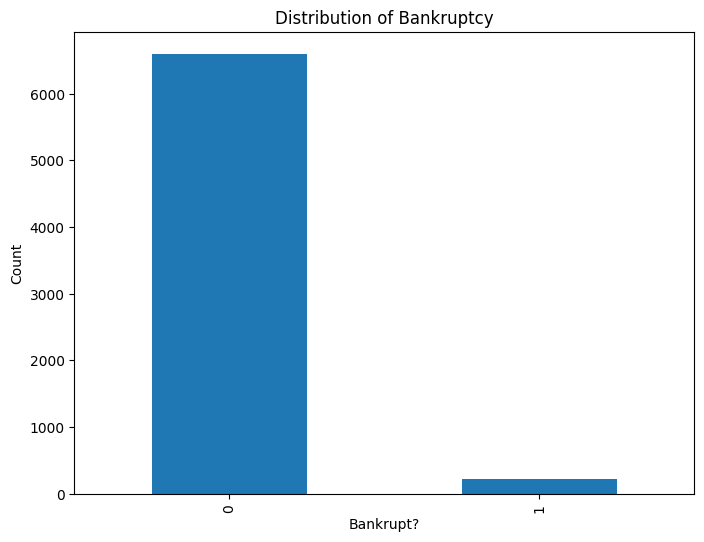

In [6]:
# EDA

# Distribution of the target variable
plt.figure(figsize=(8, 6))
df['Bankrupt?'].value_counts().plot(kind='bar')
plt.title('Distribution of Bankruptcy')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

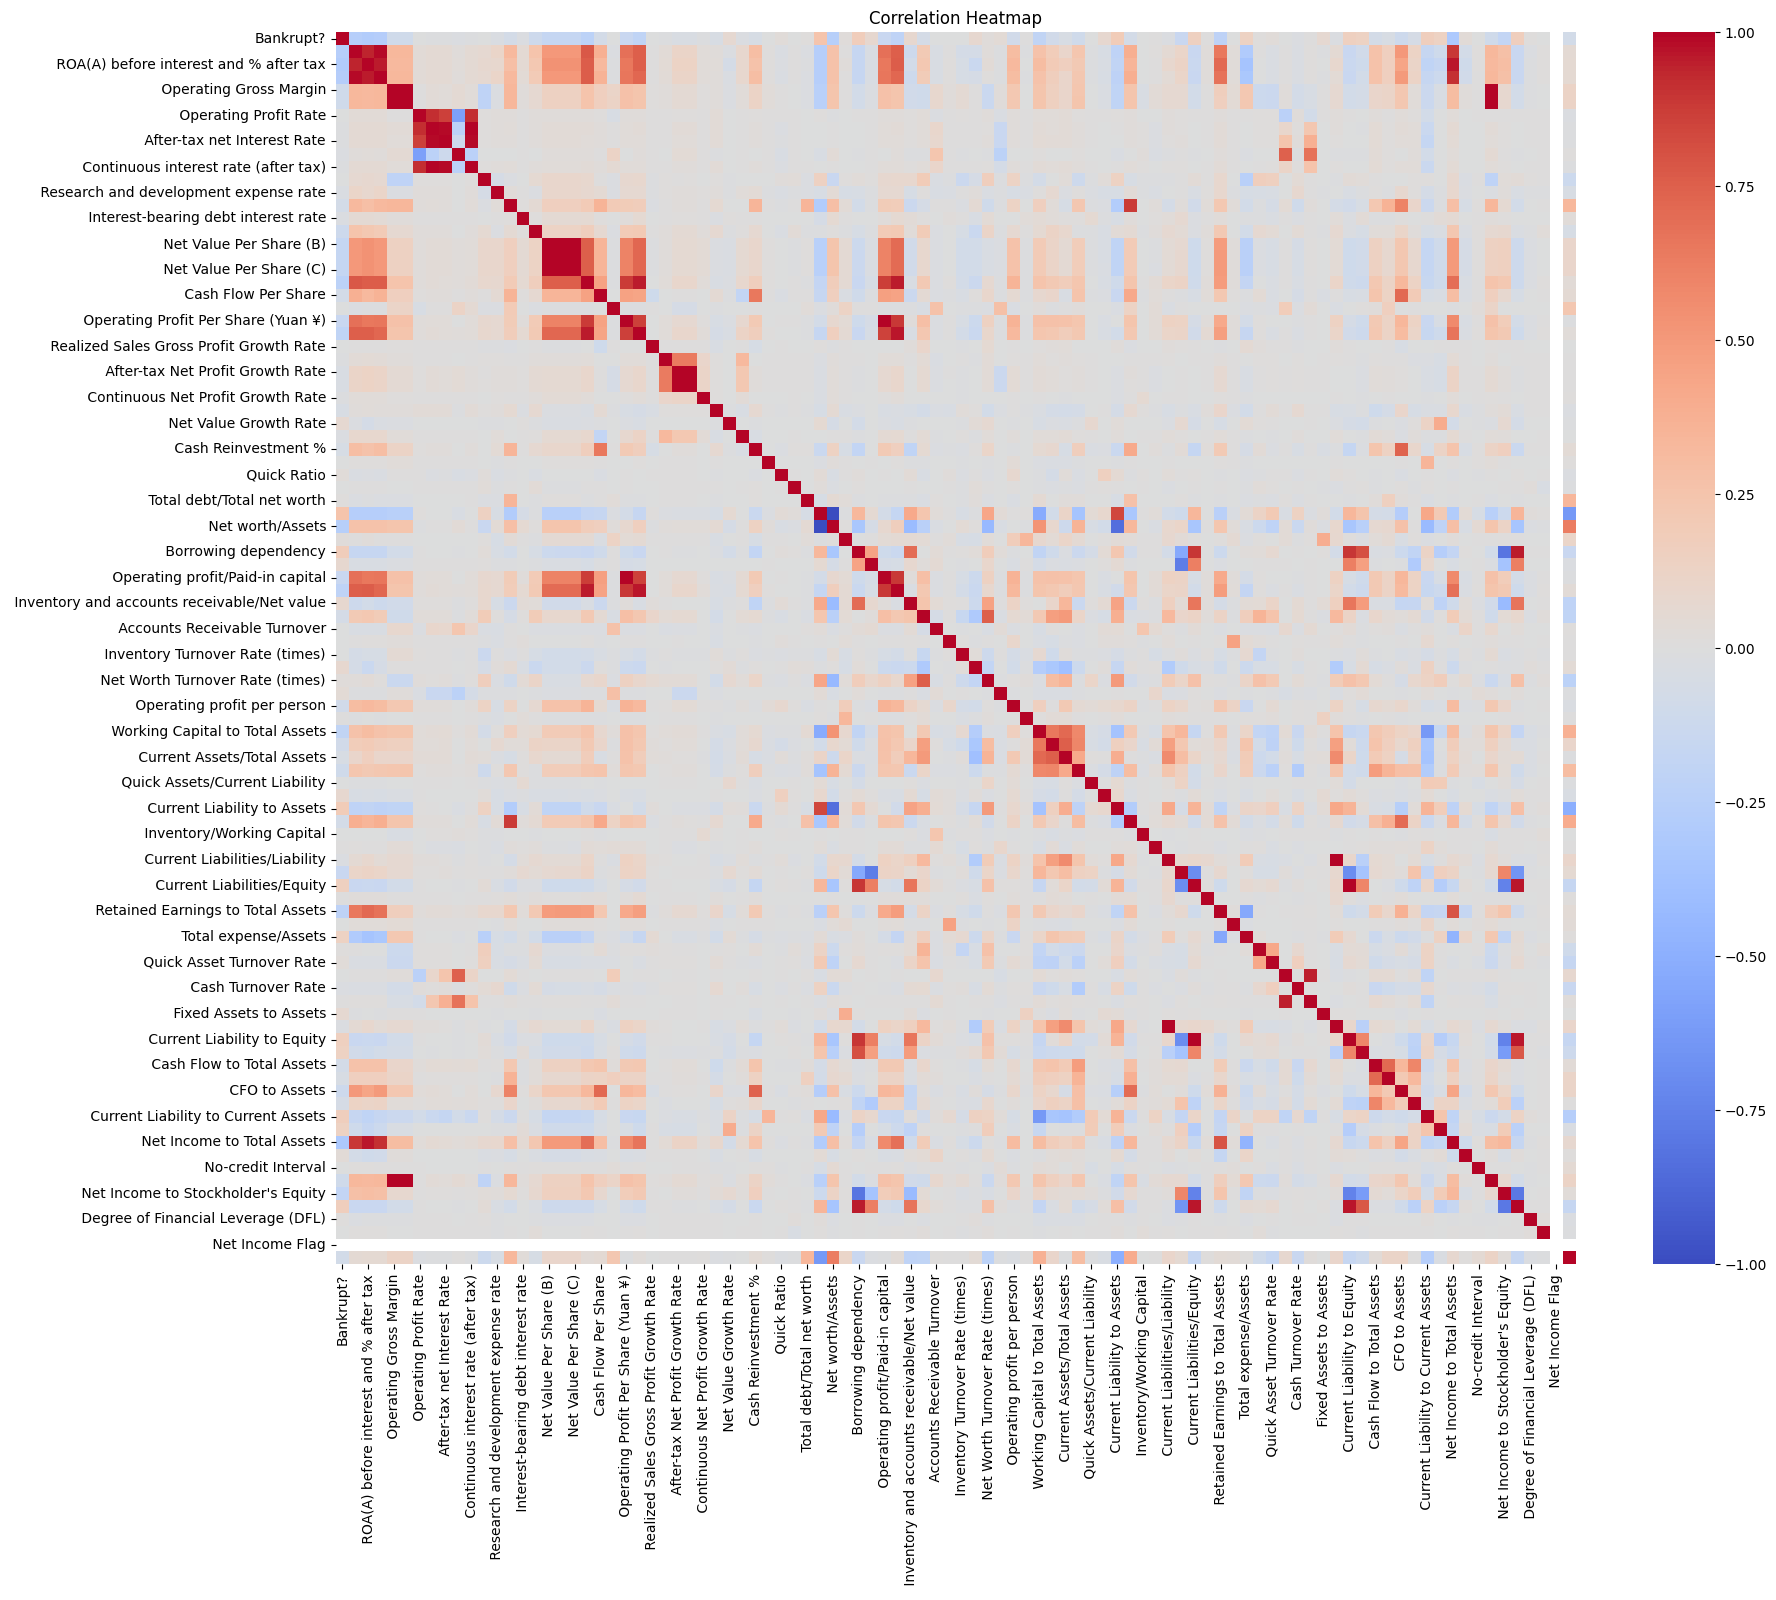

In [7]:
# Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Select top 10 features with highest correlation to the target variable
corr_with_target = df.corr()['Bankrupt?'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:11]  # Exclude the target variable itself

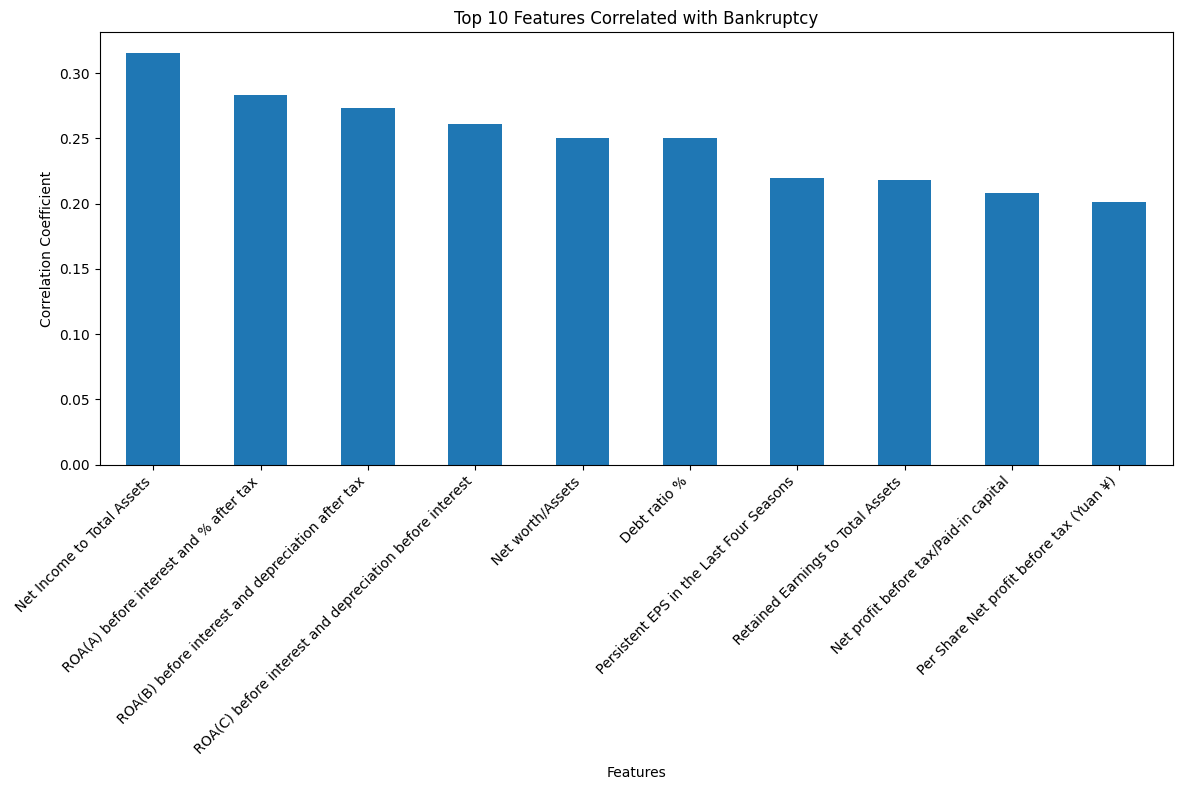

In [9]:
# Bar plot of top 10 correlated features
plt.figure(figsize=(12, 8))
top_features.plot(kind='bar')
plt.title('Top 10 Features Correlated with Bankruptcy')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Data Preparation

# Separate features and target variable
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Random Forest Model

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.80      0.16      0.26        51

    accuracy                           0.97      1364
   macro avg       0.88      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364


Confusion Matrix:
[[1311    2]
 [  43    8]]

ROC AUC Score:
0.9168496035123874


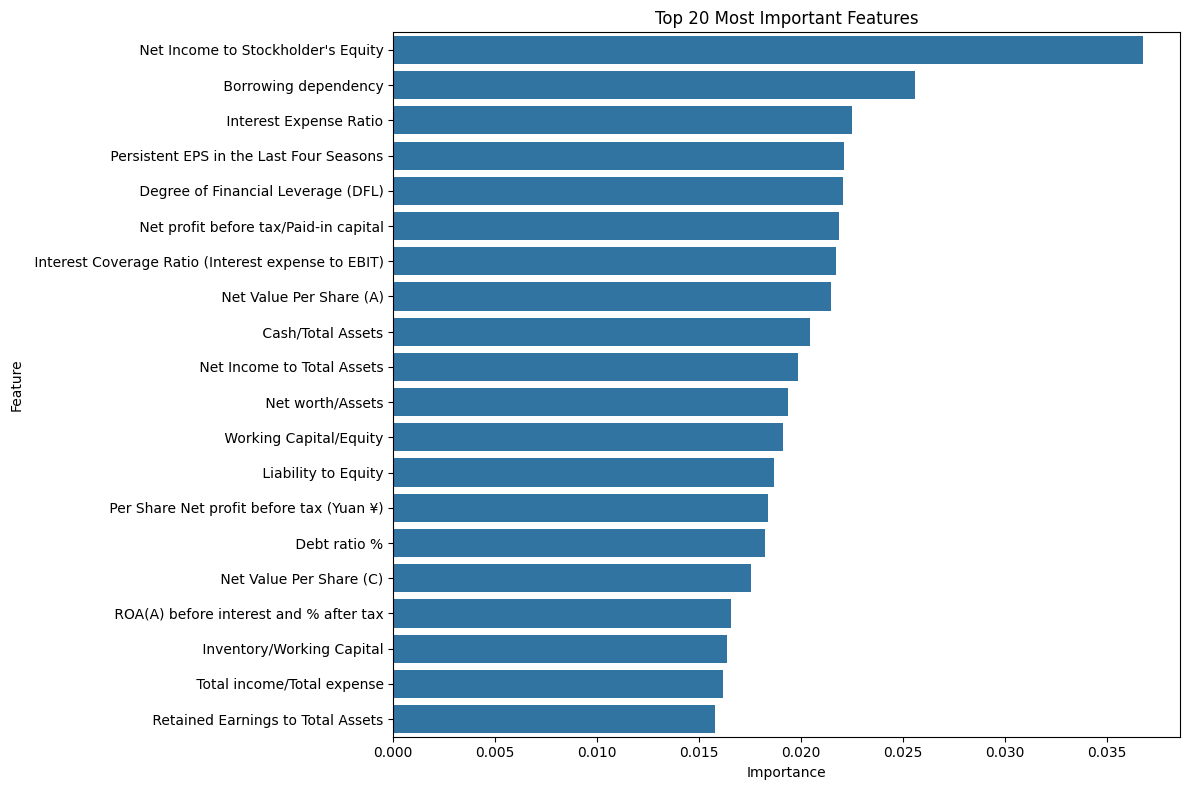


Cross-validation scores: [0.96700275 0.97066911 0.97341888 0.96883593 0.97066911]
Mean CV score: 0.9701191567369387


In [17]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())